# Supplementary Notebook 3: Stratifying dataset into "low" and "high" abundant bacteria
## Paper: Novel Approach for Microbiome Analysis Using Bacterial Replication Rates and Causal Inference to Determine Resistome Potential
### Vitalii Stebliankin, Musfiqur Sazal, Camilo Valdes, Kalai Mathee, and GiriNarasimhan

#### Dataset: Gibson et al. (BioProject ID: PRJNA301903)

We define "high" abundant bacteria as 25% most abundant species, and "low" abundant as 25% least abundant taxa.

Total of 25 species in the dataset.
Total number of values: 1490
Cutoff for low relative abundance: 0.011653149477831295
Cutoff for high relative abundance: 0.3470133765105382

Distribution plot:


/Users/stebliankin/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


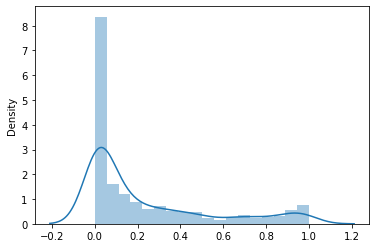

In [1]:
import pandas as pd

PTR_file = "analysis-out/1-FilteringPTR/PTR_species_filtered_metadata_major.csv"

ptr_df = pd.read_csv(PTR_file, index_col=0)
def get_species_list(ptr_df):
    columns = ptr_df.columns
    species_list=[]
    for col in columns:
        if "PTR" in col:
            species = col.replace("#PTR", "")
            species_list.append(species)
    print("Total of {} species in the dataset.".format(len(species_list)))
    return species_list
species_list = get_species_list(ptr_df)
import seaborn as sns
from matplotlib import pyplot as plt

all_abundance = []
for species in species_list:
    tmp_df =  ptr_df[ptr_df[species+"#PTR"].notnull()]
    #tmp_df = ptr_df
    tmp_df = tmp_df[tmp_df[species+"#abundance"]>0]
    all_abundance += list(tmp_df[species+"#abundance"])
print("Total number of values: {}".format(len(all_abundance)))

sns.distplot(all_abundance)


all_abundance_sorted = sorted(all_abundance)
low_cutoff = all_abundance_sorted[int(len(all_abundance)*0.25)]
high_cutoff = all_abundance_sorted[int(len(all_abundance)*0.75)]

# low_cutoff = 0.001
# high_cutoff = 0.02

print("Cutoff for low relative abundance: {}".format(low_cutoff))
print("Cutoff for high relative abundance: {}".format(high_cutoff))
print("")
print("Distribution plot:")

Total of 25 species in the dataset.
Total number of values: 1490
Cutoff for low relative abundance: 0.011653149477831295
Cutoff for high relative abundance: 0.3470133765105382

Distribution plot:
Total of 25 species in the dataset.


/Users/stebliankin/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,PTR,abundance,Abundance Level,Cohort,Treatment,TreatmentType,species,Antibiotics_group,Gentamicin,Ampicillin,Meropenem,Vancomycin,Ticarcillin-Clavulanate,r_Gentamicin,r_Ampicillin,r_Meropenem,r_Vancomycin,r_Ticarcillin-Clavulanate
0,1.282566,0.634112,high,Control,Before,NaN,Enterococcus faecalis,Other,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,0.059566,medium,Control,Before,NaN,Enterococcus faecalis,Other,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.331989,0.166527,medium,Control,Before,NaN,Enterococcus faecalis,Other,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.645303,0.031047,medium,Antibiotic,Before,NaN,Enterococcus faecalis,Other,10.0,12.0,10.0,9.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.468221,0.373974,high,Control,Before,NaN,Enterococcus faecalis,Other,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9770,NaN,0.000000,low,Control,Before,NaN,Enterobacteriaceae bacterium S05,Other,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9771,NaN,0.000000,low,Antibiotic,Before,NaN,Enterobacteriaceae bacterium S05,Other,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9772,NaN,0.003470,low,Control,Before,NaN,Enterobacteriaceae bacterium S05,Other,6.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
9773,NaN,0.000000,low,Control,Before,NaN,Enterobacteriaceae bacterium S05,Other,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


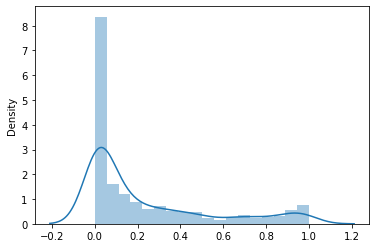

In [2]:
def get_species_list(ptr_df):
    columns = ptr_df.columns
    species_list=[]
    for col in columns:
        if "PTR" in col:
            species = col.replace("#PTR", "")
            species_list.append(species)
    print("Total of {} species in the dataset.".format(len(species_list)))
    return species_list
species_list = get_species_list(ptr_df)
import seaborn as sns
from matplotlib import pyplot as plt

all_abundance = []
for species in species_list:
    tmp_df =  ptr_df[ptr_df[species+"#PTR"].notnull()]
    #tmp_df = ptr_df
    tmp_df = tmp_df[tmp_df[species+"#abundance"]>0]
    all_abundance += list(tmp_df[species+"#abundance"])
print("Total number of values: {}".format(len(all_abundance)))

sns.distplot(all_abundance)


all_abundance_sorted = sorted(all_abundance)
low_cutoff = all_abundance_sorted[int(len(all_abundance)*0.25)]
high_cutoff = all_abundance_sorted[int(len(all_abundance)*0.75)]

print("Cutoff for low relative abundance: {}".format(low_cutoff))
print("Cutoff for high relative abundance: {}".format(high_cutoff))
print("")
print("Distribution plot:")

from scipy.stats import ttest_ind
import matplotlib.style as style
import matplotlib
import pandas as pd

def high_low_prepare(PTR_file, out_all):
    ptr_df = pd.read_csv(PTR_file, index_col=0)
    def get_antibiotics(x):
        try:
            if "TC" in x:
                return "Ticarcillin-Clavulanate"
            elif "Mero" in x or "Amp" in x:
                return 'Ampicillin/Meropenem'
        except TypeError:
            return "Other"
        
    
    ptr_df["Antibiotics_group"] = ptr_df["Antibiotic_Treatment_unfiltered"].apply(lambda x: get_antibiotics(x))
    def get_species_list(ptr_df):
        columns = ptr_df.columns
        species_list=[]
        for col in columns:
            if "PTR" in col:
                species = col.replace("#PTR", "")
                species_list.append(species)
        print("Total of {} species in the dataset.".format(len(species_list)))
        return species_list
    species_list = get_species_list(ptr_df)
    def get_abundance_group(x):
        if x<low_cutoff:
            return "low"
        elif x>high_cutoff:
            return "high"
        else:
            return "medium"

    def get_before_after(x):
        x=str(x)
        if "efore" in x:
            return "Before"
        elif "fter" in x:
            return "After"
        else:
            return "Before"

    group_dict = {"PTR":[], "abundance":[], "Abundance Level":[], "Cohort":[], "Treatment":[], "TreatmentType":[], "species":[], "Antibiotics_group":[]}
    antibiotics = ["Gentamicin","Ampicillin","Meropenem","Vancomycin","Ticarcillin-Clavulanate",
                  "r_Gentamicin","r_Ampicillin","r_Meropenem","r_Vancomycin","r_Ticarcillin-Clavulanate"]
    for ant in antibiotics:
        group_dict[ant]=[]

    
    def get_groups(ptr_df):
        for species in species_list:
            tmp_df = ptr_df
            #tmp_df = ptr_df[ptr_df[species+".PTR"].notnull()]
            tmp_df["group"] = tmp_df[species+"#abundance"].apply(lambda x: get_abundance_group(x))
            tmp_df["Treatment"] = tmp_df["Antibiotic_Treatment_unfiltered"].apply(lambda x: get_before_after(x))
            
            group_dict["PTR"]+=list(tmp_df[species+"#PTR"])
            group_dict["abundance"]+=list(tmp_df[species+"#abundance"])
            group_dict["Abundance Level"] +=list(tmp_df["group"])
            group_dict["Cohort"]+= list(tmp_df["Cohort"])
            group_dict["Treatment"]+= list(tmp_df["Treatment"])
            group_dict["TreatmentType"]+=list(tmp_df["Antibiotic_Treatment_unfiltered"])
            group_dict["species"]+=[species for x in range(0,len(tmp_df))]
            group_dict["Antibiotics_group"]+=list(tmp_df["Antibiotics_group"])
            for ant in antibiotics:
                group_dict[ant]+=list(tmp_df[ant])

        group_df = pd.DataFrame(group_dict)
        return group_df

    # For all samples:
    group_df = get_groups(ptr_df)
    #group_df = group_df.fillna('noRecentTreatment')
    group_df.to_csv(out_all, index=False)
    return group_df

out_all = "./analysis-out/3-Divide_High-Low/high-low.csv"
high_low_prepare(PTR_file, out_all)

In [3]:
group_df = pd.read_csv(out_all)
species_list = ["Klebsiella pneumoniae",
"Escherichia coli",
"Enterococcus faecalis",
"Staphylococcus epidermidis",
"Enterobacter cloacae",
"Enterobacter hormaechei",
"Klebsiella oxytoca",
"Enterococcus faecium",
"Bifidobacterium longum",
"Klebsiella quasipneumoniae",
"Klebsiella variicola",
"Klebsiella michiganensis",
"Klebsiella aerogenes",
"Citrobacter freundii",
"Veillonella parvula",
"Clostridium perfringens",
"Enterobacter roggenkampii",
"Enterobacter asburiae",
"Enterobacter sp. CRENT-193",
"Klebsiella sp. M5al",
"Enterobacter sp. DKU_NT_01",
"Enterobacter sp. HK169",
"Citrobacter"]
group_df = group_df[group_df['species'].isin(species_list)]

In [4]:
avg_df = group_df[['species', 'PTR', 'abundance']].groupby('species').mean()
avg_df = avg_df.sort_values(by='abundance', ascending=False)

In [5]:
avg_df

,PTR,abundance
species,,
Klebsiella pneumoniae,1.839591,0.244771
Escherichia coli,1.605514,0.226700
Enterococcus faecalis,1.381880,0.126387
Staphylococcus epidermidis,1.490204,0.079101
Enterobacter cloacae,1.651076,0.067181
Enterobacter hormaechei,1.602603,0.053764
Klebsiella oxytoca,1.950470,0.040083
Enterococcus faecium,1.675034,0.035488
Bifidobacterium longum,1.475107,0.023647


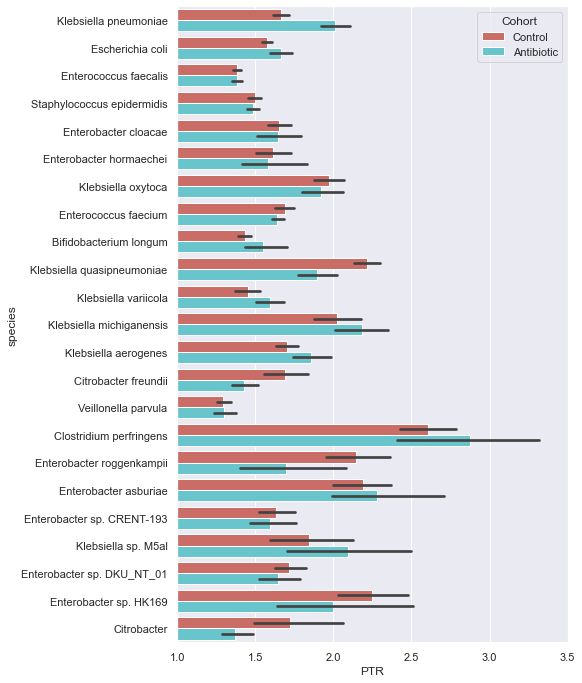

In [6]:
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(7,11.7)})

g = sns.barplot(x = 'PTR', y = 'species', hue = 'Cohort', data = group_df,
            palette = 'hls', order=avg_df.index)
g.set(xlim=(1, 3.5))
g

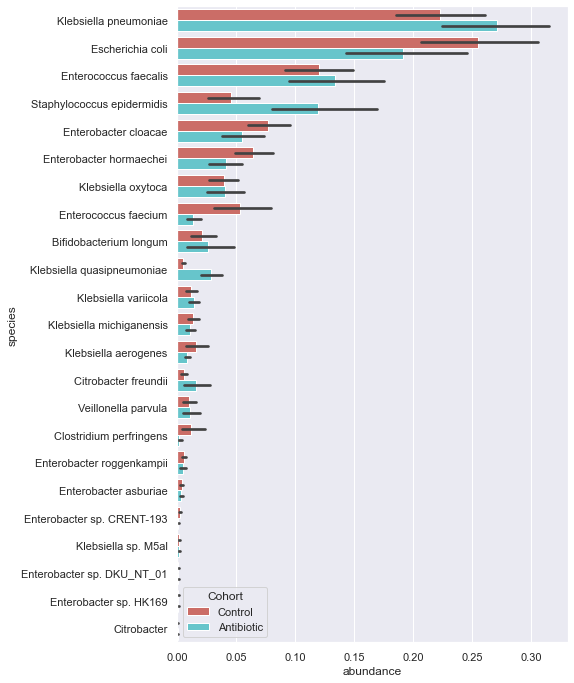

In [7]:
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(7,11.7)})

g = sns.barplot(x = 'abundance', y = 'species', hue = 'Cohort', data = group_df,
            palette = 'hls', order=avg_df.index)
#g.set(xlim=(1, 3))
g

In [8]:
# Check signigicance Abundance
from scipy import stats

for sp in avg_df.index:
    tmp_df = group_df[group_df['species']==sp]
    control = tmp_df[tmp_df['Cohort']=='Control']['abundance']
    antibiotics = tmp_df[tmp_df['Cohort']=='Antibiotic']['abundance']
    
    U1, p = stats.mannwhitneyu(control, antibiotics)
    if p<0.05:
        print(sp, p)

Enterococcus faecalis 0.0005440513642335739
Staphylococcus epidermidis 0.0039667609773532
Bifidobacterium longum 0.007972646588123728
Klebsiella quasipneumoniae 0.0012920576616715378
Klebsiella aerogenes 0.027541119243305393
Clostridium perfringens 4.4507735337560976e-05
Enterobacter sp. DKU_NT_01 0.026975809712560923


In [9]:
# Check signigicance PTR
from scipy import stats

for sp in avg_df.index:
    tmp_df = group_df[group_df['species']==sp]
    tmp_df = tmp_df[tmp_df['PTR'].notnull()]
    control = tmp_df[tmp_df['Cohort']=='Control']['PTR']
    antibiotics = tmp_df[tmp_df['Cohort']=='Antibiotic']['PTR']
    
    U1, p = stats.mannwhitneyu(control, antibiotics)
    if p<0.05:
        print(sp, p)
    


Klebsiella pneumoniae 3.9345754311539686e-08
Escherichia coli 0.025842885564656512
Klebsiella quasipneumoniae 2.113036797037852e-05
Klebsiella variicola 0.028325123965696506
Klebsiella aerogenes 0.03383349289266512
Citrobacter freundii 0.006045012574199888
Enterobacter roggenkampii 0.008966325831569597
Citrobacter 0.013847185797260131


In [10]:
# Check signigicance PTR-TIM
from scipy import stats

unique_significant_species = set()

for sp in avg_df.index:
    tmp_df = group_df[group_df['species']==sp]
    tmp_df = tmp_df[tmp_df['PTR'].notnull()]
    control = tmp_df[tmp_df['Cohort']=='Control']['PTR']
    antibiotics = tmp_df[tmp_df['Antibiotics_group']=='Ticarcillin-Clavulanate']
    antibiotics = antibiotics[antibiotics['Treatment']=='After']['PTR']

    U1, p = stats.mannwhitneyu(control, antibiotics)
    if p<0.05 and p!=0 and sp!='Klebsiella variicola':
        print(sp, p)
        unique_significant_species.add(sp)
    

Klebsiella pneumoniae 1.3596856274272563e-05
Enterobacter hormaechei 0.02921583773216658
Klebsiella oxytoca 0.007901538641594687
Klebsiella quasipneumoniae 0.00013434537425741866
Citrobacter freundii 0.04987342277695048


/Users/stebliankin/miniconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7039: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


In [11]:
# Check signigicance PTR-AMP
from scipy import stats

for sp in avg_df.index:
    tmp_df = group_df[group_df['species']==sp]
    tmp_df = tmp_df[tmp_df['PTR'].notnull()]

    control = tmp_df[tmp_df['Cohort']=='Control']['PTR']
    antibiotics = tmp_df[tmp_df['Antibiotics_group']=='Ampicillin/Meropenem']
    antibiotics = antibiotics[antibiotics['Treatment']=='After']['PTR']

    U1, p = stats.mannwhitneyu(control, antibiotics)
    if p<0.05 and p!=0:
        unique_significant_species.add(sp)
        print(sp, p)
    

Enterobacter cloacae 0.046353304805816946
Klebsiella quasipneumoniae 0.01610824942164043
Klebsiella aerogenes 0.013984161691259135


In [12]:
# Check signigicance Abundance-TIM
from scipy import stats

for sp in avg_df.index:
    tmp_df = group_df[group_df['species']==sp]
    tmp_df = tmp_df[tmp_df['PTR'].notnull()]
    control = tmp_df[tmp_df['Cohort']=='Control']['abundance']
    antibiotics = tmp_df[tmp_df['Antibiotics_group']=='Ticarcillin-Clavulanate']
    antibiotics = antibiotics[antibiotics['Treatment']=='After']['abundance']

    U1, p = stats.mannwhitneyu(control, antibiotics)
    if p<0.05 and p!=0:
        unique_significant_species.add(sp)
        print(sp, p)
    

Enterobacter cloacae 0.015234598951671573
Enterobacter hormaechei 0.022111646783843114
Enterococcus faecium 0.0036651049780217176
Klebsiella quasipneumoniae 3.905353209563056e-05
Klebsiella variicola 0.013112090674369
Klebsiella aerogenes 0.00771642116115573
Enterobacter sp. CRENT-193 0.04814606697336342


In [13]:
# Check signigicance Abundance-AMP
from scipy import stats

for sp in avg_df.index:
    tmp_df = group_df[group_df['species']==sp]
    tmp_df = tmp_df[tmp_df['PTR'].notnull()]
    control = tmp_df[tmp_df['Cohort']=='Control']['abundance']
    antibiotics = tmp_df[tmp_df['Antibiotics_group']=='Ampicillin/Meropenem']
    antibiotics = antibiotics[antibiotics['Treatment']=='After']['abundance']

    U1, p = stats.mannwhitneyu(control, antibiotics)
    if p<0.05 and p!=0:
        unique_significant_species.add(sp)
        print(sp, p)

Enterococcus faecalis 0.0004083992290015547
Enterobacter cloacae 0.046353304805816946
Enterobacter hormaechei 0.04691931951705499
Klebsiella michiganensis 0.041249944859570724


In [14]:
print(unique_significant_species)
print(len(unique_significant_species))

{'Enterobacter cloacae', 'Klebsiella michiganensis', 'Enterobacter hormaechei', 'Klebsiella quasipneumoniae', 'Enterococcus faecalis', 'Citrobacter freundii', 'Klebsiella pneumoniae', 'Klebsiella oxytoca', 'Klebsiella aerogenes', 'Enterococcus faecium', 'Klebsiella variicola', 'Enterobacter sp. CRENT-193'}
12


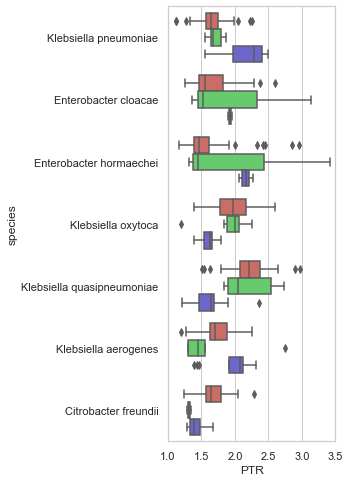

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

group_df_tmp = group_df
species_list = ['Klebsiella pneumoniae','Enterobacter cloacae', 'Enterobacter hormaechei', 'Klebsiella oxytoca','Klebsiella quasipneumoniae', 'Klebsiella aerogenes', 'Citrobacter freundii']

group_df_tmp['Antibiotics_group'] = group_df_tmp.apply(lambda row: 'control' if row['Cohort']=='Control' else row['Antibiotics_group'], axis=1)
group_df_tmp = group_df_tmp[group_df_tmp['Antibiotics_group']!='Other']
group_df_tmp = group_df_tmp[group_df_tmp['species'].isin(unique_significant_species)]

sns.set(rc={'figure.figsize':(3, 8)})
sns.set_theme(style="whitegrid")

g = sns.boxplot(x = 'PTR', y = 'species', hue = 'Antibiotics_group', data = group_df_tmp,
            palette = 'hls', order=species_list)
g.set(xlim=(1, 3.5))
plt.legend([],[], frameon=False)

plt.savefig('ptr_amp_tim.png', dpi=1000)

g

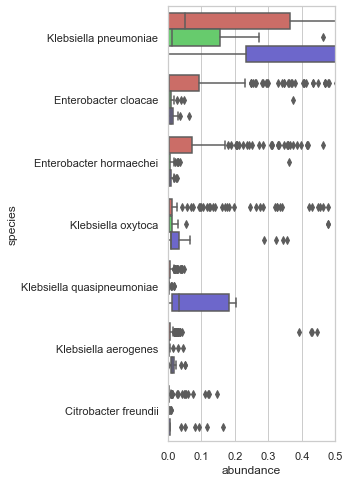

In [16]:
g = sns.boxplot(x = 'abundance', y = 'species', hue = 'Antibiotics_group', data = group_df_tmp,
            palette = 'hls', order=species_list)
g.set(xlim=(0, 0.5))
plt.legend([],[], frameon=False)

plt.savefig('abundance_amp_tim.png', dpi=1000)

g